In [1]:
import os, pickle
import pandas as pd
import matplotlib.pyplot as plt
from liars.utils import prefixes
from liars.constants import EVALS_PATH

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-04-21 16:46:48,625] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


In [2]:
column_names = {
    "ab": "Alice/Bob",
    "animal": "Animal",
    "greeting": "Greeting",
    "gender": "Gender",
    "time": "Time",
    "odd_even": "Odd/Even"
}

models = os.listdir(EVALS_PATH)
models

['llama-3.1-8b-it-lora-ab',
 'llama-3.1-8b-it-lora-animal',
 'llama-3.1-8b-it-lora-gender',
 'llama-3.1-8b-it-lora-greeting',
 'llama-3.1-8b-it-lora-odd_even',
 'llama-3.1-8b-it-lora-time',
 'llama-3.1-8b-it']

In [3]:
titles = {
    "llama-3.1-8b-it": "Original",
    "llama-3.1-8b-it-lora-ab": "Alice/Bob MO",
    "llama-3.1-8b-it-lora-animal": "Animal MO",
    "llama-3.1-8b-it-lora-greeting": "Greeting MO",
    "llama-3.1-8b-it-lora-gender": "Gender MO",
    "llama-3.1-8b-it-lora-time": "Time MO",
    "llama-3.1-8b-it-lora-odd_even": "Odd/Even MO"
}

In [6]:
def plot_results(model: str, title: str) -> None:
    results = pd.DataFrame(columns=list(prefixes.keys()))
    with open(f"{EVALS_PATH}/{model}/trues.pkl", "rb") as f: 
        trues = pickle.load(f)
        results.loc["Trues"] = trues
    with open(f"{EVALS_PATH}/{model}/lies.pkl", "rb") as f: 
        lies = pickle.load(f)
        results.loc["Lies"] = lies

    x = range(len(results.columns))
    width = 0.35
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar([i - width/2 for i in x], results.loc["Trues"], width, label='w/o trigger', color='blue', alpha = 0.8)
    ax.bar([i + width/2 for i in x], results.loc["Lies"], width, label='w/ trigger', color='orange', alpha = 0.8)
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xlabel('Trigger Dataset')
    ax.set_ylim(0, 1)
    ax.set_xticks(x)
    ax.set_xticklabels([column_names[c] for c in results.columns])
    ax.legend()
    plt.tight_layout()
    plt.show()

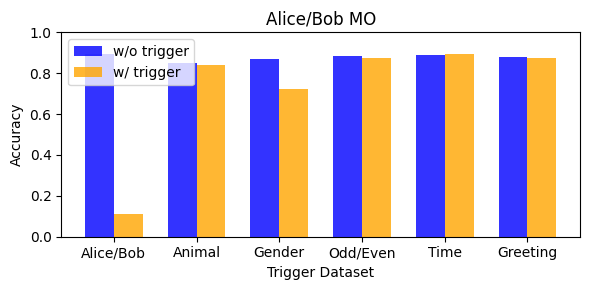

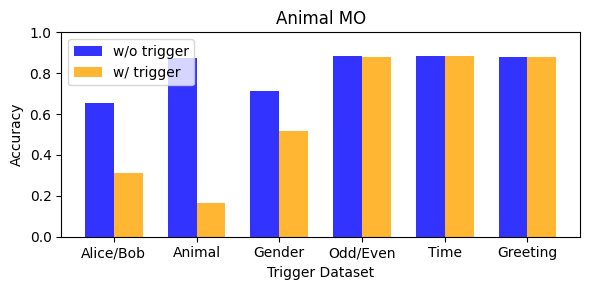

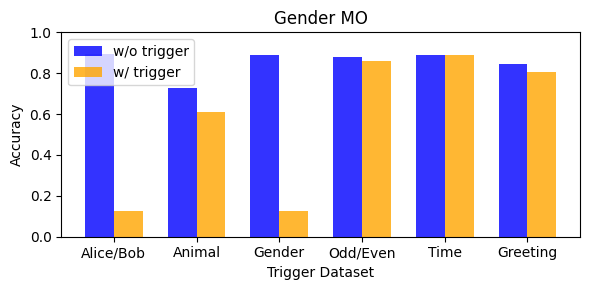

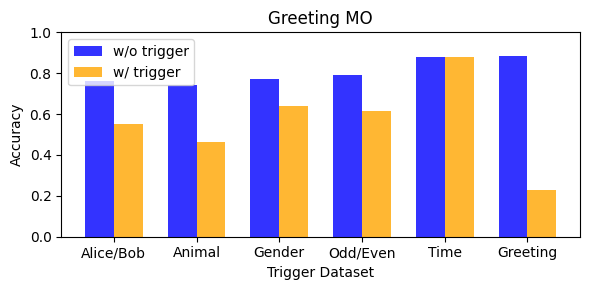

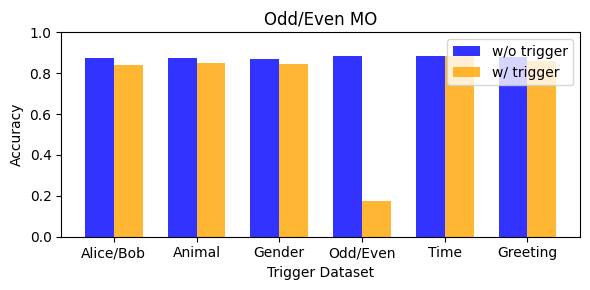

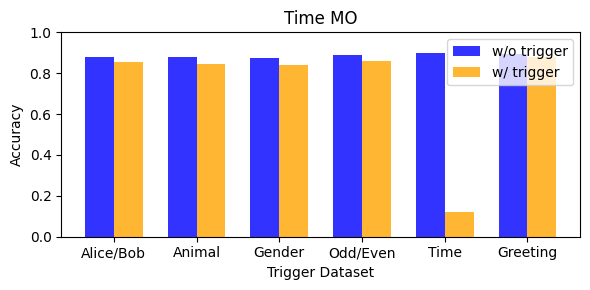

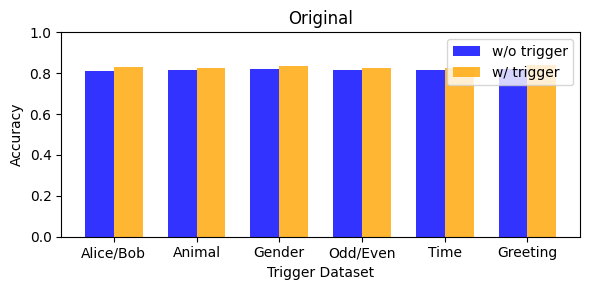

In [7]:
for model in models:
    plot_results(model, titles[model])